In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')

### Load the csv data

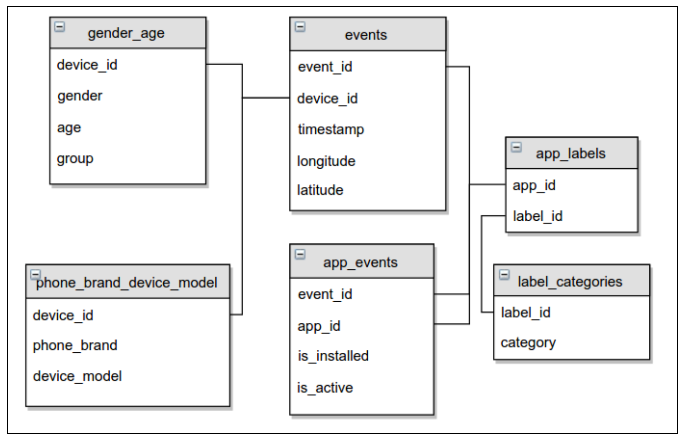

In [2]:
plt.figure(figsize=(12, 10))
img = plt.imread('./image/data_schema.png')
plt.xticks([]); plt.yticks([])
plt.imshow(img); plt.show()

In [9]:
gender_age_train = pd.read_csv('./data/gender_age_train.csv')
phone_brand_device_model = pd.read_csv('./data/phone_brand_device_model.csv')
events = pd.read_csv('./data/events.csv')
app_events = pd.read_csv('./data/app_events.csv')
app_labels = pd.read_csv('./data/app_labels.csv')
label_categories = pd.read_csv('./data/label_categories.csv')

In [73]:
print('+'*25, ' '*5, '+'*25)
print('{:25s} \t {}'.format('file name:', 'column name'))
print('+'*25, ' '*5, '+'*25)
print('{:25s} \t {}'.format('gender_age_train:', gender_age_train.columns.values))
print('{:25s} \t {}'.format('phone_brand_device_model:', phone_brand_device_model.columns.values))
print('{:25s} \t {}'.format('events:', events.columns.values))
print('{:25s} \t {}'.format('app_events:', app_events.columns.values))
print('{:25} \t {}'.format('app_labels:', app_labels.columns.values))
print('{:25s} \t {}'.format('label_categories:', label_categories.columns.values))
print('+'*25, ' '*5, '+'*25)

+++++++++++++++++++++++++       +++++++++++++++++++++++++
file name:                	 column name
+++++++++++++++++++++++++       +++++++++++++++++++++++++
gender_age_train:         	 ['device_id' 'gender' 'age' 'group']
phone_brand_device_model: 	 ['device_id' 'phone_brand' 'device_model']
events:                   	 ['event_id' 'device_id' 'timestamp' 'longitude' 'latitude']
app_events:               	 ['event_id' 'app_id' 'is_installed' 'is_active']
app_labels:               	 ['app_id' 'label_id']
label_categories:         	 ['label_id' 'category']
+++++++++++++++++++++++++       +++++++++++++++++++++++++


### Determine the NaN values

In [74]:
print('+'*30)
print('{:>10s}   + {:>10s}'.format('Before', 'After'))
print('+'*30)
print('{:10d}   + {:10d}'.format(len(gender_age_train), len(gender_age_train.dropna())))
print('{:10d}   + {:10d}'.format(len(phone_brand_device_model), len(phone_brand_device_model.dropna())))
print('{:10d}   + {:10d}'.format(len(events), len(events.dropna())))
print('{:10d}   + {:10d}'.format(len(app_events), len(app_events.dropna())))
print('{:10d}   + {:10d}'.format(len(app_labels), len(app_labels.dropna())))
print('{:10d}   + {:10d}'.format(len(label_categories), len(label_categories.dropna())))
print('+'*30)

++++++++++++++++++++++++++++++
    Before   +      After
++++++++++++++++++++++++++++++
     74645   +      74645
    187245   +     187245
   3252950   +    3252950
  32473067   +   32473067
    459943   +     459943
       930   +        927
++++++++++++++++++++++++++++++


Only three NaN values in label_categories.csv

In [75]:
label_categories[pd.isnull(label_categories['category'].values)]

,label_id,category
0,1,NaN
229,248,NaN
245,264,NaN


### Manually set variables for NaN values in label_categories.csv

In [90]:
label_categories.loc[0, 'category'] = 'Unknown_1'
label_categories.loc[229, 'category'] = 'Unknown_2'
label_categories.loc[245, 'category'] = 'Unknown_3'

In [93]:
# make sure there is no NaN values
print('+'*30)
print('{:>10s}   + {:>10s}'.format('Before', 'After'))
print('+'*30)
print('{:10d}   + {:10d}'.format(len(gender_age_train), len(gender_age_train.dropna())))
print('{:10d}   + {:10d}'.format(len(phone_brand_device_model), len(phone_brand_device_model.dropna())))
print('{:10d}   + {:10d}'.format(len(events), len(events.dropna())))
print('{:10d}   + {:10d}'.format(len(app_events), len(app_events.dropna())))
print('{:10d}   + {:10d}'.format(len(app_labels), len(app_labels.dropna())))
print('{:10d}   + {:10d}'.format(len(label_categories), len(label_categories.dropna())))
print('+'*30)

++++++++++++++++++++++++++++++
    Before   +      After
++++++++++++++++++++++++++++++
     74645   +      74645
    187245   +     187245
   3252950   +    3252950
  32473067   +   32473067
    459943   +     459943
       930   +        930
++++++++++++++++++++++++++++++


### Duplicates information

In [95]:
print('+'*42)
print('{:>10s}  {:>10s}  {:>12s}'.format('Before', 'After', 'Difference'))
print('+'*42)
print('{:10d}  {:10d}  {:12d}'.format(len(gender_age_train), len(gender_age_train.drop_duplicates(subset='device_id')),
                                      len(gender_age_train)-len(gender_age_train.drop_duplicates(subset='device_id'))))
print('{:10d}  {:10d}  {:12d}'.format(len(phone_brand_device_model), len(phone_brand_device_model.drop_duplicates(subset='device_id')), 
                                      len(phone_brand_device_model)-len(phone_brand_device_model.drop_duplicates(subset='device_id'))))
print('{:10d}  {:10d}  {:12d}'.format(len(events), len(events.drop_duplicates(subset='event_id')), 
                                      len(events)-len(events.drop_duplicates(subset='event_id'))))
print('{:10d}  {:10d}  {:12d}'.format(len(app_events), len(app_events.drop_duplicates(subset='event_id')), 
                                      len(app_events)-len(app_events.drop_duplicates(subset='event_id'))))
print('{:10d}  {:10d}  {:12d}'.format(len(app_labels), len(app_labels.drop_duplicates(subset='app_id')), 
                                      len(app_labels)-len(app_labels.drop_duplicates(subset='app_id'))))
print('{:10d}  {:10d}  {:12d}'.format(len(label_categories), len(label_categories.drop_duplicates(subset='label_id')), 
                                      len(label_categories)-len(label_categories.drop_duplicates(subset='label_id'))))
print('+'*42)

++++++++++++++++++++++++++++++++++++++++++
    Before       After    Difference
++++++++++++++++++++++++++++++++++++++++++
     74645       74645             0
    187245      186716           529
   3252950     3252950             0
  32473067     1488096      30984971
    459943      113211        346732
       930         930             0
++++++++++++++++++++++++++++++++++++++++++


### Combine data for training and test set
Mainly according to device_id

Note: there are some duplicated values, but only a very small subset duplicates (around 194).

Further analysis find that the duplicates are due to the duplicates happened in 'phone_brand_device_model.csv' files.

There, just drop the duplicates by keeping the first value

In [96]:
# merge gender_age_train with phone_brand_device_model
gender_age_brand_train = gender_age_train.merge(phone_brand_device_model, how='left', on='device_id')

print('{:25s} \n{}\n'.format('gender_age_brand_train:', gender_age_brand_train.columns.values))
print('Data size:\t {:10d} (before merge) \t{:10d} (after merge)'.format(len(gender_age_train), 
                                                                         len(gender_age_brand_train)))

gender_age_brand_train:   
['device_id' 'gender' 'age' 'group' 'phone_brand' 'device_model']

Data size:	      74645 (before merge) 	     74839 (after merge)


In [97]:
# drop the duplicates
gender_age_brand_train = gender_age_brand_train.drop_duplicates(subset='device_id', keep='first')
print('Data size after dropping duplicates: \t', len(gender_age_brand_train))

Data size after dropping duplicates: 	 74645


In [98]:
# keep merging with events.csv on 'device_id'
gender_age_brand_events_train = gender_age_brand_train.merge(events, how='left', on='device_id')

print('{:40s} \n{}\n'.format('gender_age_brand_events_train:', gender_age_brand_events_train.columns.values))

print('Data size:\t {:10d} (before merge) \t{:10d} (after merge)'.format(len(gender_age_brand_train), 
                                                                         len(gender_age_brand_events_train)))

gender_age_brand_events_train:           
['device_id' 'gender' 'age' 'group' 'phone_brand' 'device_model' 'event_id'
 'timestamp' 'longitude' 'latitude']

Data size:	      74645 (before merge) 	   1266931 (after merge)


In [99]:
# keep merging with app_events.csv on 'event_id'
gender_age_brand_events_app_train = gender_age_brand_events_train.merge(app_events, how='left', on='event_id')

print('{:40s} \n{}\n'.format('gender_age_brand_events_app_train:', gender_age_brand_events_app_train.columns.values))
print('Data size:\t {:10d} (before merge) \t{:10d} (after merge)'.format(len(gender_age_brand_events_train), 
                                                                         len(gender_age_brand_events_app_train)))

gender_age_brand_events_app_train:       
['device_id' 'gender' 'age' 'group' 'phone_brand' 'device_model' 'event_id'
 'timestamp' 'longitude' 'latitude' 'app_id' 'is_installed' 'is_active']

Data size:	    1266931 (before merge) 	  12947753 (after merge)


In [100]:
# keep merging with app_labels.csv on 'app_id'
gender_age_brand_events_app_label_train = gender_age_brand_events_app_train.merge(app_labels, how='left', 
                                                                                  on='app_id')

print('{:40s} \n{}\n'.format('gender_age_brand_events_app_label_train:', 
                             gender_age_brand_events_app_label_train.columns.values))
print('Data size:\t {:10d} (before merge) \t{:10d} (after merge)'.format(len(gender_age_brand_events_app_train), 
                                                                         len(gender_age_brand_events_app_label_train)))

gender_age_brand_events_app_label_train: 
['device_id' 'gender' 'age' 'group' 'phone_brand' 'device_model' 'event_id'
 'timestamp' 'longitude' 'latitude' 'app_id' 'is_installed' 'is_active'
 'label_id']

Data size:	   12947753 (before merge) 	  13407594 (after merge)


In [101]:
# keep merging with app_categories.csv on 'label_id'
gender_age_brand_events_app_label_category_train = gender_age_brand_events_app_label_train.merge(label_categories, 
                                                                                                 how='left', 
                                                                                                 on='label_id')

print('{:40s} \n{}\n'.format('gender_age_brand_events_app_label_category_train:', 
                             gender_age_brand_events_app_label_category_train.columns.values))
print('Data size:\t {:10d} (before merge) \t{:10d} (after merge)'.format(len(gender_age_brand_events_app_label_train), 
                                                                         len(gender_age_brand_events_app_label_category_train)))

gender_age_brand_events_app_label_category_train: 
['device_id' 'gender' 'age' 'group' 'phone_brand' 'device_model' 'event_id'
 'timestamp' 'longitude' 'latitude' 'app_id' 'is_installed' 'is_active'
 'label_id' 'category']

Data size:	   13407594 (before merge) 	  13407594 (after merge)


### Dive into the merged data

In [103]:
gender_age_brand_events_app_label_category_train.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,app_id,is_installed,is_active,label_id,category
0,-8076087639492063270,M,35,M32-38,小米,MI 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2897161552818060146,M,35,M32-38,小米,MI 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-8260683887967679142,M,35,M32-38,小米,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,4.287147e+18,1.0,0.0,NaN,NaN
3,-8260683887967679142,M,35,M32-38,小米,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,-4.085687e+18,1.0,0.0,NaN,NaN
4,-8260683887967679142,M,35,M32-38,小米,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,6.324195e+18,1.0,0.0,NaN,NaN


In [117]:
print(gender_age_brand_events_app_label_category_train.isnull().sum())
print('Total data number: \t', len(gender_age_brand_events_app_label_category_train))

device_id              0
gender                 0
age                    0
group                  0
phone_brand            0
device_model           0
event_id           51336
timestamp          51336
longitude          51336
latitude           51336
app_id            710556
is_installed      710556
is_active         710556
label_id        12871126
category        12871126
dtype: int64
Total data number: 	 13407594


### Drop columns that has too many NaN values

In [112]:
df_train = gender_age_brand_events_app_label_category_train.drop(['label_id', 'category'], axis=1)

In [118]:
print(df_train.isnull().sum())
print('Total data number: \t', len(gender_age_brand_events_app_label_category_train))

device_id            0
gender               0
age                  0
group                0
phone_brand          0
device_model         0
event_id         51336
timestamp        51336
longitude        51336
latitude         51336
app_id          710556
is_installed    710556
is_active       710556
dtype: int64
Total data number: 	 13407594


### Drop rows that has NaN values

In [121]:
df_train = df_train.dropna()

In [122]:
print(df_train.isnull().sum())
print('Total data number: \t', len(gender_age_brand_events_app_label_category_train))

device_id       0
gender          0
age             0
group           0
phone_brand     0
device_model    0
event_id        0
timestamp       0
longitude       0
latitude        0
app_id          0
is_installed    0
is_active       0
dtype: int64
Total data number: 	 13407594


In [125]:
df_train.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,app_id,is_installed,is_active
2,-8260683887967679142,M,35,M32-38,小米,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,4.287147e+18,1.0,0.0
3,-8260683887967679142,M,35,M32-38,小米,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,-4.085687e+18,1.0,0.0
4,-8260683887967679142,M,35,M32-38,小米,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,6.324195e+18,1.0,0.0
5,-8260683887967679142,M,35,M32-38,小米,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,-8.687507e+18,1.0,0.0
6,-8260683887967679142,M,35,M32-38,小米,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,8.772885e+17,1.0,1.0
